Saving z6330970817984_882a99088b8e0cb1831d54998e30e525.jpg to z6330970817984_882a99088b8e0cb1831d54998e30e525 (7).jpg


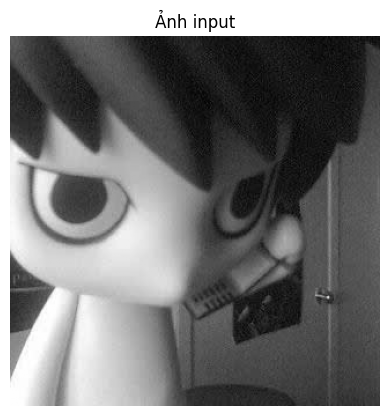

Nhấn phím [I - G - L - H - C]: I


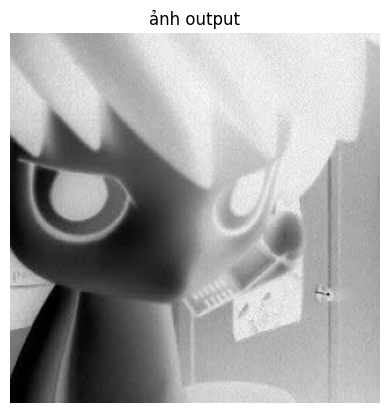

In [12]:
# BÀI TẬP 1

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# import ảnh từ máy
uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = Image.open(filename).convert('L')

# show ảnh gốc (để so sánh với ảnh đã biến đổi)
plt.imshow(img, cmap='gray')
plt.title('Ảnh input')
plt.axis('off')
plt.show()

# Tạo menu chọn phím
key = input("Nhấn phím [I - G - L - H - C]: ").upper()# upper để khi mà gõ chữ thường thì vẫn xuất ra chữ hoa tránh bị lỗi

if key == 'I':
    # Bài 1 - Inverse
    im_l = np.asarray(img)                                           # im_l: ảnh gốc
    im_2 = 255 - im_l # lấy 255 - pixel cũ(đảo ngược cái màu pixel)    # im_2: ảnh âm bản
    new_img = Image.fromarray(im_2)

elif key == 'G':
    # Bài 2 - Gamma Correction
    # output = 255 * (pixel / max_pixel)^gamma
    gamma = 0.5                           # gamma < 1 ( làm sáng)    # gamma < 1 ( làm tối)
    im_l = np.asarray(img).astype(float)  # tránh lỗi khi tính mũ
    b2 = np.max(im_l) #lấy pixel sáng nhất trong ảnh
    b3 = im_l / b2                     # chuẩn hóa về [0,1]
    b4 = np.power(b3, gamma)          # áp dụng gamma
    c = b4 * 255.0                     # nhân lại về thang 0–255
    cl = np.clip(c, 0, 255).astype(np.uint8)  # ép kiểu uint8
    new_img = Image.fromarray(cl)

elif key == 'L':
    # Bài 3 - Log Transformation
    im_l = np.asarray(img).astype(float)
    max_val = np.max(im_l) # lấy pixel lớn nhất trong ảnh
    cl = (128.0 * np.log(1 + im_l)) / np.log(1 + max_val) # áp dụng log để làm sáng vùng tối, chuẩn hóa theo max, nhân 128 để đủ sáng
    cl = np.uint8(cl) # giới hạn px từ 0-255 , ngoài phạm vi lỗi nha má
    new_img = Image.fromarray(cl)

elif key == 'H':
    # Bài 4 - Histogram Equalization
    iml = np.asarray(img)                  # chuyển ảnh sang mảng NumPy
    bl = iml.flatten()                     # làm phẳng ảnh thành 1 chiều
    hist, bins = np.histogram(iml, 256, [0, 255])  # tính histogram
    cdf = hist.cumsum()                    # tính hàm tích lũy (CDF)
    cdf_m = np.ma.masked_equal(cdf, 0)     # bỏ qua giá trị CDF = 0 để tránh chia 0
    num_cdf_m = (cdf_m - cdf_m.min()) * 255        # tử số chuẩn hóa
    den_cdf_m = cdf_m.max() - cdf_m.min()          # mẫu số chuẩn hóa
    cdf_m = num_cdf_m / den_cdf_m          # chuẩn hóa về 0–255
    cdf_m = np.ma.filled(cdf_m, 0).astype('uint8')
    im2 = cdf_m[bl]                         # ánh xạ lại điểm ảnh theo CDF mới
    im3 = np.reshape(im2, iml.shape)       # đưa về lại kích thước ảnh gốc
    new_img = Image.fromarray(im3)
elif key == 'C':
    # Bài 5 - Contrast Stretching
    iml = np.asarray(img).astype(float)
    a = iml.min() #lấy gtri pixel nhỏ nhất
    b = iml.max()#lấy gtri pixel lớn nhất
    im2 = 255 * (iml - a) / (b - a) # # đưa min về 0, max về 255 để tăng độ tương phản ảnh( kẽo giãn độ t phản)
    new_img = Image.fromarray(im2.astype(np.uint8))

else:
    print("Phím không hợp lệ!")
    new_img = None

# Hiển thị ảnh sau biến đổi
if new_img:
    plt.imshow(new_img, cmap='gray')
    plt.title('ảnh output')
    plt.axis('off')
    plt.show()


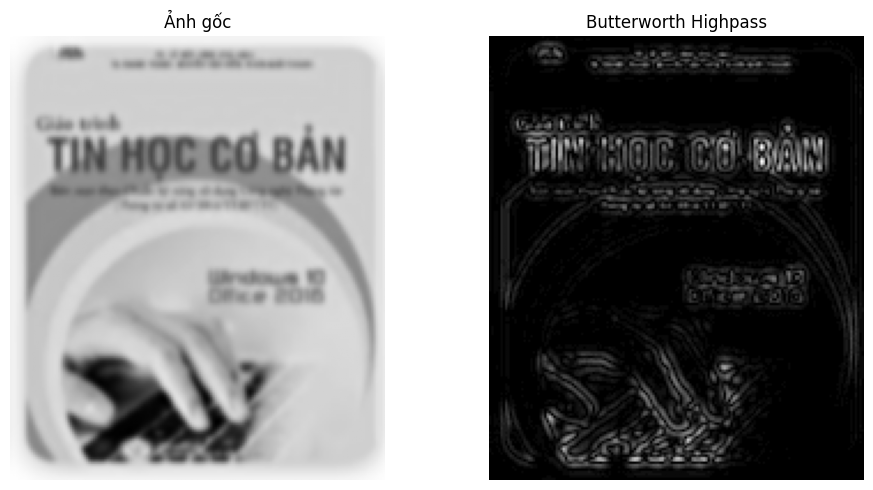

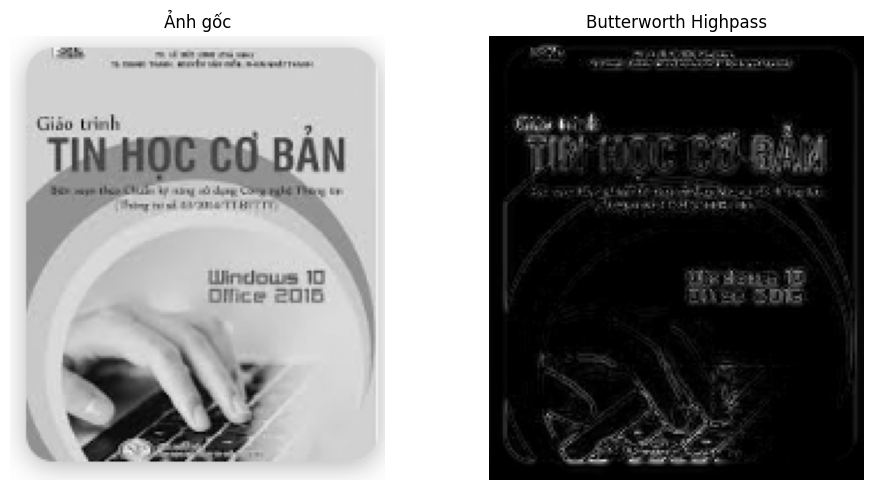

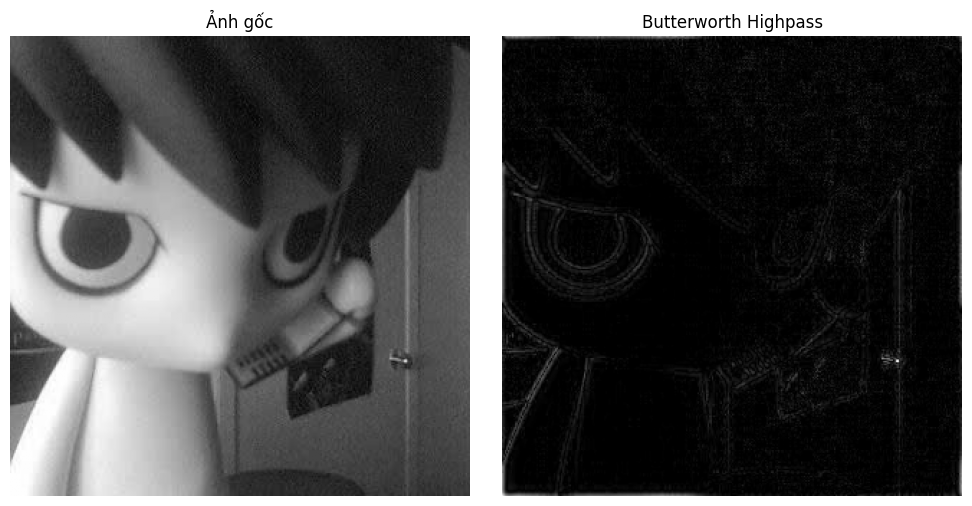

In [19]:
# BÀI TẬP 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
from IPython.display import clear_output

os.makedirs("exercise", exist_ok=True)

# Cho người dùng upload ảnh mới
print("upload ảnh cần xử lý:")
uploaded = files.upload()

# Lưu ảnh vào thư mục "exercise"
for name in uploaded.keys():
    with open(os.path.join("exercise", name), 'wb') as f:
        f.write(uploaded[name])

# Hàm thực hiện biến đổi Fourier
def fast_fourier_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # chuyển ảnh sang xám
    f = np.fft.fft2(gray)                         # biến đổi Fourier 2D
    fshift = np.fft.fftshift(f)                   # chuyển tâm phổ ra giữa
    magnitude = 20 * np.log(np.abs(fshift) + 1)   # tính biên độ
    return magnitude

# Hàm lọc Butterworth (lowpass hoặc highpass)
def butterworth_filter(img, cutoff, order, lowpass=True):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # chuyển ảnh sang xám
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2              # lấy tọa độ tâm ảnh

    dft = np.fft.fft2(gray)
    dft_shift = np.fft.fftshift(dft)

    # tạo mặt nạ lọc với meshgrid đúng chiều
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')

    D = np.sqrt(u**2 + v**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))  # ct lọc

    if not lowpass:
        H = 1 - H  # chuyển sang highpass

    filtered = dft_shift * H
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back.astype(np.uint8)

# Hàm xla theo lựa chọn
def process_images(mode):
    for file in os.listdir("exercise"):
        path = os.path.join("exercise", file)
        img = cv2.imread(path)

        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        if mode == 'F':
            output = fast_fourier_transform(img)
            out_name = "FFT_" + file
            title = "Fourier Transform"
            plt.imsave(os.path.join("exercise", out_name), output, cmap='gray')

        elif mode == 'L':
            output = butterworth_filter(img, cutoff=30, order=2, lowpass=True)
            out_name = "Lowpass_" + file
            title = "Butterworth Lowpass"
            cv2.imwrite(os.path.join("exercise", out_name), output)

        elif mode == 'H':
            output = butterworth_filter(img, cutoff=30, order=2, lowpass=False)
            out_name = "Highpass_" + file
            title = "Butterworth Highpass"
            cv2.imwrite(os.path.join("exercise", out_name), output)

        else:
            print("Gõ sai rồi! Chọn lại đê! : F, L, hoặc H")
            return

        # Show in và out
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(gray, cmap='gray')
        axs[0].set_title("Ảnh gốc")
        axs[0].axis('off')

        axs[1].imshow(output, cmap='gray')
        axs[1].set_title(title)
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

# In hướng dẫn lựa chọn
print("CHỌN PP XỬ LÝ ẢNH:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

# Nhập lựa chọn từ người dùng
key = input("Nhập lựa chọn (F/L/H): ").strip().upper()
clear_output()

# Gọi hàm xử lý
process_images(key)
